In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
def logistic(x, mu):
    return mu * x * (1 - x)

In [ ]:
def logistic_iter(x, mu, n):
    if x is None:
        x = np.random.random()
    seq = [x]
    for k in range(n):
        seq.append(logistic(seq[-1], mu))
    return np.array(seq)

In [ ]:
def bifurcation(mu_init=0, mu_final=4, delta_mu=0.001, n_iter=5000, get_last=200):
    yy = []
    xx = []
    for mu in tqdm.tqdm(np.arange(mu_init, mu_final+delta_mu, delta_mu)):
        if mu > 4.: mu = 4.
        seq = logistic_iter(None, mu, n_iter)
        #print(type(seq), seq)
        yy += list(seq[-get_last:])
        xx += [mu] * get_last
    return np.array(xx), np.array(yy)

In [ ]:
xx, yy = bifurcation(delta_mu=0.0001, n_iter=50000, get_last=4000)

  0%|          | 0/40001 [00:00<?, ?it/s]

100%|██████████| 40001/40001 [11:26<00:00, 58.26it/s]


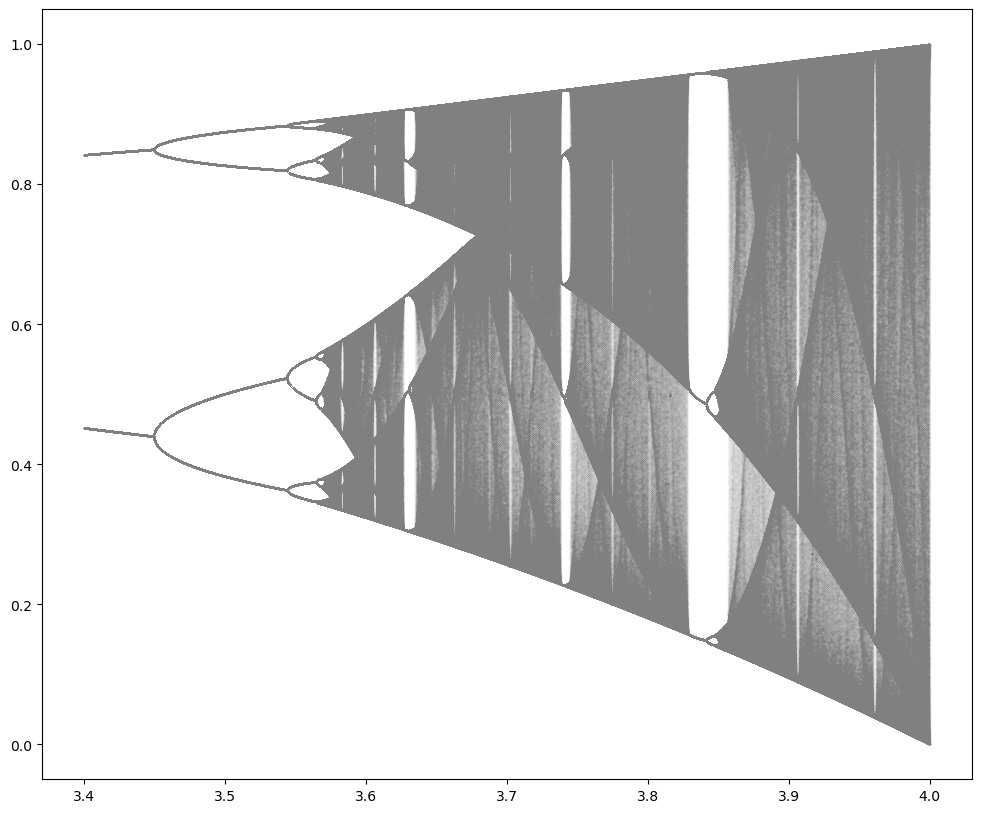

In [ ]:
from_mu = 3.4
to_mu = 4.0
indm = np.where((xx >= from_mu) & (xx <= to_mu))
plt.figure(figsize=(12,10))
plt.plot(xx[indm], yy[indm], '.', markersize=0.005, alpha=1, color='gray')

In [ ]:
def lyapunov_exponent(mu, n_iter=20000, get_last=14000):
    seq = logistic_iter(None, mu, n_iter)[-get_last:]
    dev_logistic = mu * (1 - 2 * seq)
    return np.log(np.abs(dev_logistic)).sum() / get_last

In [ ]:
lyapunov_exponent(3.6)

0.18374429866598493

In [ ]:
def lyapunov_exponent_iter(mu_init=0, mu_final=4, delta_mu=0.0001, n_iter=20000, get_last=14000):
    lyapunov = []
    mus = []
    for mu in tqdm.tqdm(np.arange(mu_init, mu_final+delta_mu, delta_mu)):
        if mu > 4.: mu = 4.
        lyapunov.append(lyapunov_exponent(mu, n_iter=n_iter, get_last=get_last))
        mus.append(mu)
    return np.array(mus), np.array(lyapunov)

In [ ]:
mus, lyapunov = lyapunov_exponent_iter()

  0%|          | 0/40001 [00:00<?, ?it/s]/tmp/ipykernel_1018/2352038750.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(np.abs(dev_logistic)).sum() / get_last
100%|██████████| 40001/40001 [04:26<00:00, 150.27it/s]


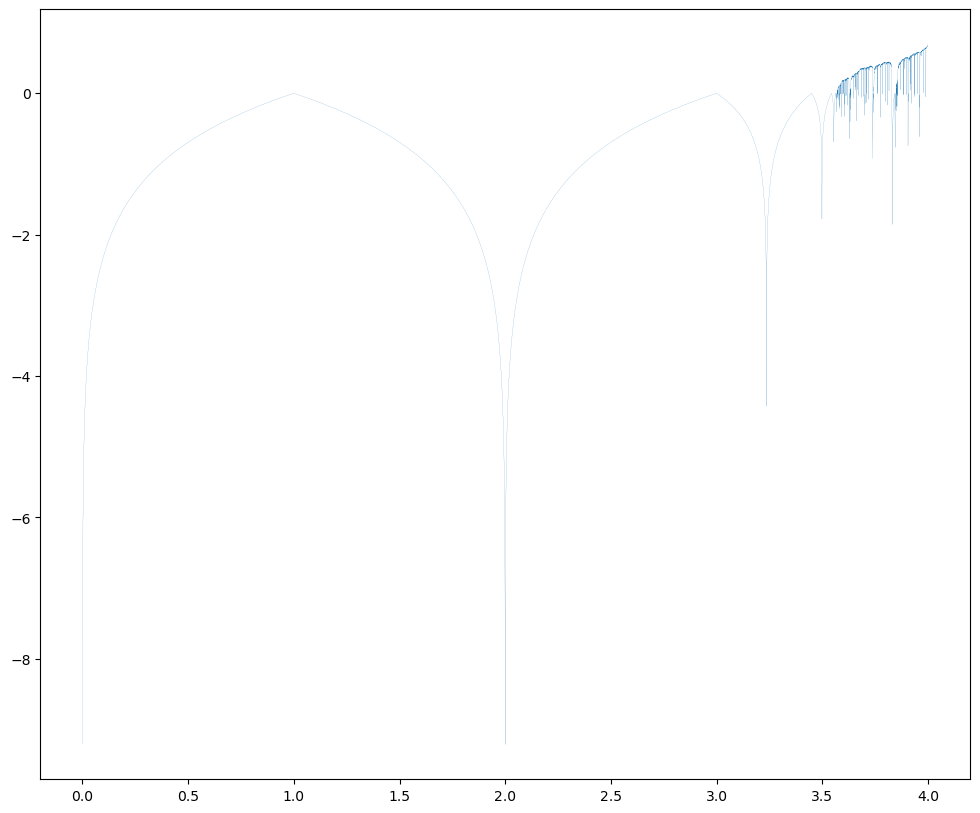

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(mus, lyapunov, '-', markersize=0.005, linewidth=0.1)

In [ ]:
def lyapunov_derivation(mu, n_iter=20000, get_last=14000):
    x = logistic_iter(None, mu, n_iter)[-get_last:]
    if mu == 0: return None
    dlyap = 0
    prev_dev = 0
    for k in range(1, len(x)):
        xk = x[k]
        xk_1 = x[k - 1]
        dev = xk_1 * (1 - xk_1) + mu * (1 - 2 * xk_1) * prev_dev
        dlyap += (2 / (2 * xk - 1)) * dev
        prev_dev = dev
    dlyap /= (len(x) - 1)
    dlyap += 1 / mu
    return dlyap
    #return (2 * x[:-1] * (1 - x[:-1]) / (2 * x[1:] - 1)).sum() / (get_last - 1) + 1 / mu

In [ ]:
def lyapunov_derivation_iter(mu_init=0, mu_final=4, delta_mu=0.0001, n_iter=20000, get_last=14000):
    ld = []
    mus = []
    for mu in tqdm.tqdm(np.arange(mu_init, mu_final+delta_mu, delta_mu)):
        if mu > 4.: mu = 4.
        ld.append(lyapunov_derivation(mu, n_iter=n_iter, get_last=get_last))
        mus.append(mu)
    return np.array(mus), np.array(ld)

In [ ]:
musd, ld = lyapunov_derivation_iter()

 89%|████████▉ | 35715/40001 [11:00<01:15, 57.08it/s]/tmp/ipykernel_1018/1769460585.py:10: RuntimeWarning: overflow encountered in scalar multiply
  dlyap += (2 / (2 * xk - 1)) * dev
/tmp/ipykernel_1018/1769460585.py:10: RuntimeWarning: invalid value encountered in scalar add
  dlyap += (2 / (2 * xk - 1)) * dev
/tmp/ipykernel_1018/1769460585.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dev = xk_1 * (1 - xk_1) + mu * (1 - 2 * xk_1) * prev_dev
 89%|████████▉ | 35751/40001 [11:00<01:13, 57.84it/s]/tmp/ipykernel_1018/1769460585.py:10: RuntimeWarning: overflow encountered in scalar add
  dlyap += (2 / (2 * xk - 1)) * dev
100%|██████████| 40001/40001 [12:14<00:00, 54.47it/s]


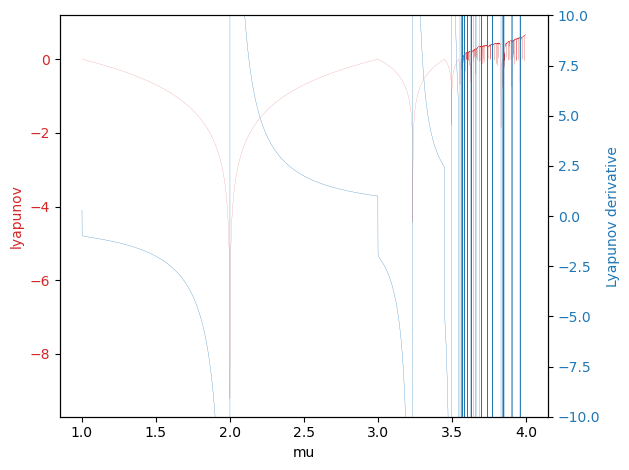

In [ ]:
fig, ax1 = plt.subplots()

mu_init = 1
mu_final = 4

indm = np.where(np.logical_and(mus>=mu_init, mus<=mu_final))[0]

color = 'tab:red'
ax1.set_xlabel('mu')
ax1.set_ylabel('lyapunov', color=color)
ax1.plot(mus[indm], lyapunov[indm], color=color, linewidth=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Lyapunov derivative', color=color)  # we already handled the x-label with ax1
ax2.plot(mus[indm], ld[indm], color=color, linewidth=0.2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-10, 10])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Proof

#### Logistic Map:

$x_{k+1} = f(x_k; \mu) = \mu x_k ( 1 - x_k)$

$f'(x_k; \mu) = \frac{df}{dx_k} = \mu (1 - 2 x_k)$

#### Lyapunov Exponent:

$\lambda = \lim_{n\to\infty} \frac{1}{n} \sum_{k=0}^{n} \ln |f'(x_k; \mu)| =$

$= \lim_{n\to\infty} \frac{1}{n} \sum_{k=0}^{n} \ln \mu |1 - 2 x_k| = \lim_{n\to\infty} \frac{1}{n} [\sum_{k=0}^{n} \ln \mu + \sum_{k=0}^{n} \ln |1 - 2 x_k| =$

$ =\lim_{n\to\infty} [ \ln \mu + \frac{1}{n} \sum_{k=0}^{n} \ln |1 - 2 x_k| = \lim_{n\to\infty} \lambda_n$

where

$\lambda_n = \ln \mu + \frac{1}{n} \sum_{k=0}^{n-1} \ln |1 - 2 x_k|$

#### Derivative of Lyapunov exponent w.r.t. $\mu$:

$ \frac{d \lambda_n}{d \mu} = \frac{1}{\mu} + \frac{1}{n} \sum_{k=0}^{n-1} \frac{d}{d \mu} (\ln |1 - 2 x_k(\mu)|) $

The term in the summation can be written as
$ \frac{d}{d \mu} (\ln |1 - 2 x_k(\mu)|) = \frac{1}{|1 - 2 x_k(\mu)|} \frac{d}{d \mu} |1 - 2 x_k(\mu)|$

If $1 - 2 x_k > 0$ then $ \frac{d}{d \mu} (\ln |1 - 2 x_k(\mu)|) = \frac{1}{1 - 2 x_k} \cdot \frac{d}{d \mu} (1 - 2 x_k(\mu)) = \frac{2}{2 x_k - 1} \frac{d x_k(\mu)}{d \mu}$

Otherwise if $1 - 2 x_k < 0$ then $ \frac{d}{d \mu} (\ln |1 - 2 x_k(\mu)|) = \frac{1}{2 x_k - 1} \cdot \frac{d}{d \mu} (2 x_k(\mu) - 1) = \frac{2}{2 x_k - 1} \frac{d x_k(\mu)}{d \mu}$

Note that in both cases, the result is the same.

The derivative of $x_k({\mu)}$ with respect to ${\mu}$ is:

$\frac{d x_k(\mu)}{d \mu} = \frac{\partial x_k(\mu)}{\partial \mu} + \frac{\partial x_k}{\partial x_{k-1}} \frac{d x_{k-1}(\mu)}{d \mu} = x_{k-1} (1 - x_{k-1}) + \mu (1 - 2 x_{k-1}) \cdot \frac{d x_{k-1}(\mu)}{d \mu} = x_{k-1} (1 - x_{k-1}) + f'(x_{k-1}) \cdot \frac{d x_{k-1}(\mu)}{d \mu}$

Then:

$ \frac{d \lambda_n}{d \mu} = \frac{1}{\mu} + \frac{1}{n} \sum_{k=0}^{n-1} \frac{2}{2 x_k - 1} \frac{d x_k(\mu)}{d \mu} = \frac{1}{\mu} + \frac{1}{n} \sum_{k=0}^{n-1} \frac{2}{2 x_k - 1} \cdot [x_{k-1} (1 - x_{k-1}) + \mu (1 - 2 x_{k-1}) \cdot \frac{d x_{k-1}(\mu)}{d \mu})]$